In [116]:
# i have a list of tickers that I want set in a column
# i can use that list to pass through yfinance and then 
# if stocks historical data is revealing our defined relationship to the bollinger band, we should record it 
# if we create an empty list outside of the iteration then we can add any tickers that meet the condition
# from the list that meets the conition we can create a graph of each of the stocks tha meet the condition so we can look at it 

In [120]:
import datetime as dt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf

path = 'watchlist_drain_city.csv'
df = pd.read_csv(path)
df.dropna()
df_symbol = df.Symbol
df_symbol.dropna()
df_symbol.head()

0    AAPL
1    MSFT
2     DIS
3    AMAT
4     TSM
Name: Symbol, dtype: object

In [121]:
# we now have a different data frame for each stock
chart = pd.DataFrame(None)

# create a dataframe for each ticker and store it in a dicitonary that relates to each stonky
dictionary = {}
count = 0
for ticker in df_symbol:
    chart = yf.Ticker(ticker).history(period = 'ytd').reset_index()[['Date','Close']]
    dictionary[count] = {ticker: chart}
    count += 1
    
# now each ticker has stock data stored in its dataframe

In [128]:
# i want to create a data frame for each stock now 
# now a dataframe for each stock should be stored in a list as its own entry
# list[apple df, m]
my_list = [[None, None]]
county = 0
for x in dictionary:
    new = dictionary[x].values()
    for xx in new:
        my_list.append(xx)
        count += 1
del my_list[0]
my_list

[          Date       Close    low_band   high_band
 0   2021-01-04  128.804825         NaN         NaN
 1   2021-01-05  130.397324         NaN         NaN
 2   2021-01-06  126.007957         NaN         NaN
 3   2021-01-07  130.307755         NaN         NaN
 4   2021-01-08  131.432465         NaN         NaN
 ..         ...         ...         ...         ...
 202 2021-10-21  149.479996  137.642886  150.402823
 203 2021-10-22  148.690002  138.520004  150.889991
 204 2021-10-25  148.639999  139.092368  151.393341
 205 2021-10-26  149.320007  139.562500  151.968924
 206 2021-10-27  148.850006  139.932630  152.393082
 
 [207 rows x 4 columns],
           Date       Close    low_band   high_band
 0   2021-01-04  216.275375         NaN         NaN
 1   2021-01-05  216.484009         NaN         NaN
 2   2021-01-06  210.870728         NaN         NaN
 3   2021-01-07  216.871460         NaN         NaN
 4   2021-01-08  218.192841         NaN         NaN
 ..         ...         ...         .

In [123]:
# now i want to be able to measure the bollinger band strategy for each dataframe in the list
import ta
from ta.utils import dropna

In [124]:
boll_df = []
def add_boll(list_df): 
    incr = 0
    while incr <= len(list_df) - 1:
        current = list_df[incr]
        boil = ta.volatility.BollingerBands(close=my_list[incr]["Close"], window=14)
        # bb strategy has a lower and a higher band in the ta lib
        current['low_band'] = boil.bollinger_lband()
        current['high_band'] = boil.bollinger_hband()
        current.dropna()
        # store the new dataframes and then iterate through them to do the bollinger calculations
        boll_df.append(current)
        incr += 1       
add_boll(my_list)


Today's close for DIS is: 169.55
The lower bollinger band for DIS is: 168.11

Consider buying: DIS


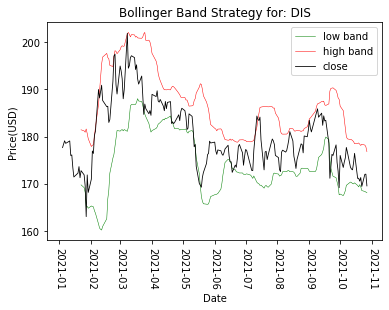


Today's close for FB is: 312.22
The lower bollinger band for FB is: 311.30

Consider buying: FB


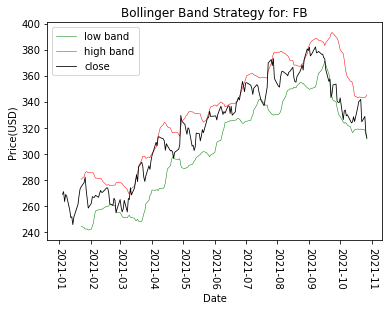


Today's close for V is: 215.78
The lower bollinger band for V is: 218.50

Consider buying: V


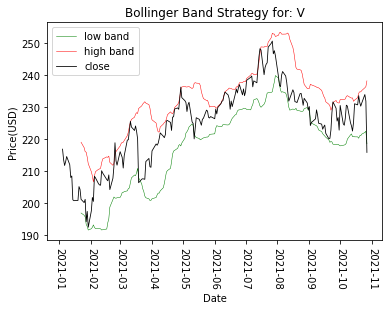

In [127]:
# now i need to create a function that can loop through each of the dataframes in the list
# we honestly do not need to chart these now, but maybe later we can do this 
# at each dataframe in the list, we need to add the lowband and high band strategies as columns
# we can then evaluate based on our strategy make_sugg
# if to _buy is true, then we should return the name of the stock that passes the conditons

def percentage_change(close, low):
    if low != 0 :
        return float(close - low) / abs(low) * 100
    else:
        return "undefined"

# this will grant access to the low band and close columns
def make_sugg(bollinger_df, symbol):
    incr = 0
    for x in bollinger_df: # list of df
        
        current = bollinger_df[incr] # incr = 0; looking at aapl
        today_close = current.iloc[-1]['Close']
        today_lband = current.iloc[-1]["low_band"]
        strategy = percentage_change(today_close, today_lband) 
        
        if strategy < 1.0:
            print("Today's close for " + symbol[incr] + " is: " + "{:.2f}".format(today_close))
            print("The lower bollinger band for " + symbol[incr] + " is: " + "{:.2f}".format(today_lband))          
            print("\nConsider buying: " + symbol[incr])
            
            sns.lineplot(x=current['Date'], y=current['low_band'], label = 'low band', color = 'green', linewidth = .5)
            sns.lineplot(x=current['Date'], y=current['high_band'], label = 'high band', color = 'r', linewidth = .5)
            sns.lineplot(x=current['Date'], y=current['Close'],label= 'close', color = 'black', linewidth = .8)
            plt.legend()
            plt.title("Bollinger Band Strategy for: " + symbol[incr])
            plt.ylabel('Price(USD)')
            plt.xticks(rotation = -90)
            plt.show()
            print("")
        incr += 1      
                                       
make_sugg(boll_df, df_symbol)

In [ ]:
`         

<AxesSubplot:xlabel='Date', ylabel='low_band'>

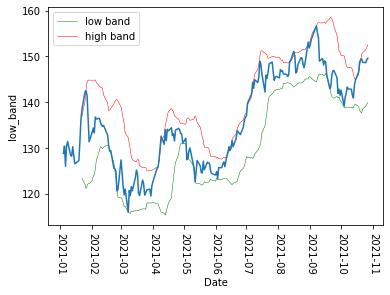

149.59129333496094

'SHOP'

Today's close is: 149.59
The lower band of the bollinger is: 139.88

Do not buy: SHOP


In [16]:
# now i need to create a function that can loop through each of the dataframes in the list
# we honestly do not need to chart these now, but maybe later we can do this 
# at each dataframe in the list, we need to add the lowband and high band strategies as columns
# we can then evaluate based on our strategy to_buy()
# if to _buy is true, then we should return the name of the stock that passes the conditons


""
